<a href="https://colab.research.google.com/github/SMSajadi99/Nerual-Network/blob/main/assinments/4/Method01/HW04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

def create_folders():
    # Define the folder names
    folder_names = ['img-tr', 'img-com','img-pos']

    # Check and create folders
    for folder_name in folder_names:
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
            print(f"Folder '{folder_name}' created.")
        else:
            print(f"Folder '{folder_name}' already exists.")

# Call the function to create folders
create_folders()


Folder 'img-tr' created.
Folder 'img-com' created.
Folder 'img-pos' created.


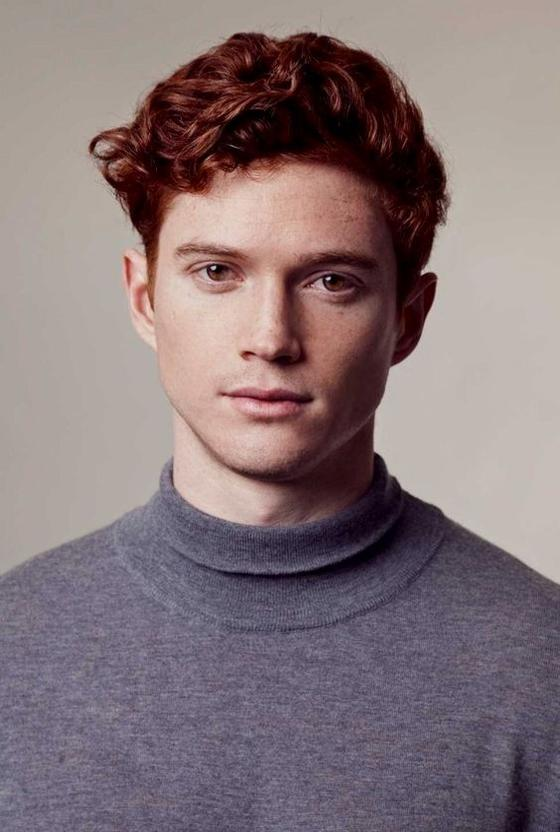

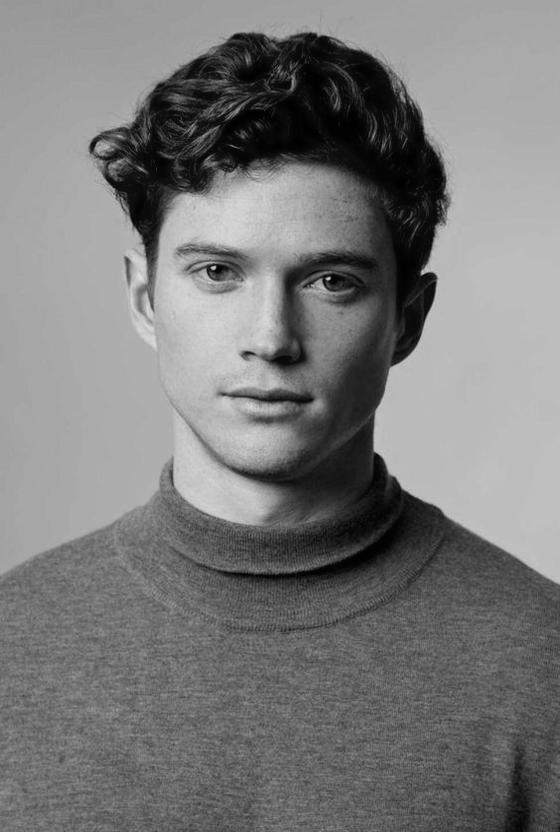

In [2]:
from PIL import Image
from IPython.display import display  # If you're using Jupyter Notebook or IPython

def show_image(image_path):
    try:
        # Open the image file
        img = Image.open(image_path)

        # Convert the image to black and white
        bw_img = img.convert('L')

        # Display the original and black and white images side by side
        display(img)       # Display the original image
        display(bw_img)    # Display the black and white image

        # Save the black and white image (optional)
        bw_img.save('bw_face.jpg')

    except Exception as e:
        print(f"Error: {e}")

# Replace 'face.jpg' with the actual path to your image file
image_path = '/content/face.jpg'

# Call the function to show the images
show_image(image_path)


In [3]:
import os
import random
from PIL import Image
import numpy as np

# Create folders if they don't exist
os.makedirs("img-tr", exist_ok=True)
os.makedirs("img-pos", exist_ok=True)

# Load the black and white image
image_path = "/content/bw_face.jpg"
image = Image.open(image_path).convert("L")  # Convert to grayscale

# Get image dimensions
image_width, image_height = image.size

# Set the size of the 16x16 frame
frame_size = 16

# Set the number of frames to extract
num_frames = 2000

# Randomly select frames and save them along with their positions
for i in range(num_frames):
    # Randomly choose the top-left corner of the 16x16 frame
    top_left_x = random.randint(0, image_width - frame_size)
    top_left_y = random.randint(0, image_height - frame_size)

    # Crop the 16x16 frame
    frame = image.crop((top_left_x, top_left_y, top_left_x + frame_size, top_left_y + frame_size))

    # Save the frame to the img-tr folder
    frame_filename = f"img-tr/frame_{i + 1}.png"
    frame.save(frame_filename)

    # Save the position to the img-pos folder
    pos_filename = f"img-pos/frame_{i + 1}_pos.txt"
    with open(pos_filename, "w") as pos_file:
        pos_file.write(f"Top-left corner: ({top_left_x}, {top_left_y})")

print("Frames and positions saved successfully.")


Frames and positions saved successfully.


In [4]:
import os
import re
from PIL import Image, ImageDraw

# Define the paths
img_pos_folder = "img-pos"

# Create a blank white image
blank_image = Image.new("L", (560, 832), color="white")

# Get a list of filenames
img_pos_files = [f for f in os.listdir(img_pos_folder) if f.endswith("_pos.txt")]

# Draw each image on the blank image based on its position
for pos_filename in img_pos_files:
    # Extract image index from the filename
    image_index = int(pos_filename.split("_")[1])

    # Load the position data
    pos_path = os.path.join(img_pos_folder, pos_filename)

    with open(pos_path, "r") as pos_file:
        pos_content = pos_file.read()

    # Get the position coordinates
    match = re.search(r"\((\d+), (\d+)\)", pos_content)
    top_left_x, top_left_y = int(match.group(1)), int(match.group(2))

    # Load the corresponding image
    img_path = os.path.join("img-tr", f"frame_{image_index}.png")
    img = Image.open(img_path).convert("L")

    # Paste the image onto the blank image
    blank_image.paste(img, (top_left_x, top_left_y))

# Save or display the result
blank_image.save("combined_image.png")
blank_image.show()


In [5]:
import os
import numpy as np
from PIL import Image

# Create the img-com folder if it doesn't exist
os.makedirs("img-com", exist_ok=True)

# Set the path to the img-tr folder
img_tr_folder = "img-tr"

# Function to calculate the average of 4x4 frames in a 16x16 frame
def calculate_average(frame):
    average_frames = []

    for i in range(0, 16, 4):
        for j in range(0, 16, 4):
            sub_frame = frame.crop((i, j, i + 4, j + 4))
            average_pixel = int(np.mean(np.array(sub_frame)))
            average_frames.append(average_pixel)

    return average_frames

# Process each image in the img-tr folder
for filename in os.listdir(img_tr_folder):
    if filename.endswith(".png"):
        # Load the 16x16 frame
        frame_path = os.path.join(img_tr_folder, filename)
        frame = Image.open(frame_path).convert("L")

        # Calculate the average of 4x4 frames
        average_frames = calculate_average(frame)

        # Create a new 4x4 image with the averaged frames
        new_image = Image.new("L", (4, 4))
        new_image.putdata(average_frames)

        # Save the new image to the img-com folder with the same name
        com_filename = os.path.join("img-com", filename)
        new_image.save(com_filename)

print("Averaged 4x4 frames saved successfully.")


Averaged 4x4 frames saved successfully.


In [6]:
import os
import re
from PIL import Image, ImageDraw

# Define the paths
img_pos_folder = "img-pos"

# Create a blank white image
blank_image = Image.new("L", (560, 832), color="white")

# Get a list of filenames
img_pos_files = [f for f in os.listdir(img_pos_folder) if f.endswith("_pos.txt")]

# Draw each image on the blank image based on its position
for pos_filename in img_pos_files:
    # Extract image index from the filename
    image_index = int(pos_filename.split("_")[1])

    # Load the position data
    pos_path = os.path.join(img_pos_folder, pos_filename)

    with open(pos_path, "r") as pos_file:
        pos_content = pos_file.read()

    # Get the position coordinates
    match = re.search(r"\((\d+), (\d+)\)", pos_content)
    top_left_x, top_left_y = int(match.group(1)), int(match.group(2))

    # Load the corresponding image
    img_path = os.path.join("img-com", f"frame_{image_index}.png")
    img = Image.open(img_path).convert("L")

    # Paste the image onto the blank image
    blank_image.paste(img, (top_left_x, top_left_y))

# Save or display the result
blank_image.save("combined_image_com.png")

In [7]:
import os
import numpy as np
from PIL import Image
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load images from img-com folder (4x4)
img_com_folder = "/content/img-com"
img_tr_folder = "/content/img-tr"

# Get a list of filenames
img_com_files = [f for f in os.listdir(img_com_folder) if f.endswith(".png")]

# Initialize lists to store input and output data
X_com = []  # Input data (img-com)
y_tr = []   # Output data (img-tr)

# Load and flatten images
for filename in img_com_files:
    img_com_path = os.path.join(img_com_folder, filename)
    img_tr_path = os.path.join(img_tr_folder, filename)

    img_com = np.array(Image.open(img_com_path).convert("L")).flatten()
    img_tr = np.array(Image.open(img_tr_path).convert("L")).flatten()

    X_com.append(img_com)
    y_tr.append(img_tr)

# Convert lists to NumPy arrays
X_com = np.array(X_com)
y_tr = np.array(y_tr)

# Split the data into training and testing sets
X_com_train, X_com_test, y_tr_train, y_tr_test = train_test_split(X_com, y_tr, test_size=0.05, random_state=42)

# Create and train the MLP model
mlp_com_to_tr = MLPRegressor(hidden_layer_sizes=(400,200), max_iter=5000, random_state=42)
mlp_com_to_tr.fit(X_com_train, y_tr_train)

# Predict on the test set
y_tr_pred = mlp_com_to_tr.predict(X_com_test)

# Evaluate the model
mse = mean_squared_error(y_tr_test, y_tr_pred)
accuracy = 100 - mse  # Assuming higher accuracy for lower MSE

print(f"Mean Squared Error: {mse}")
print(f"Accuracy: {accuracy:.2f}%")


Mean Squared Error: 53.53802659712831
Accuracy: 46.46%


In [8]:
import os

def create_folders():
    # Define the folder names
    folder_names = ['img-test', 'img-com-test','img-pos-test']

    # Check and create folders
    for folder_name in folder_names:
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
            print(f"Folder '{folder_name}' created.")
        else:
            print(f"Folder '{folder_name}' already exists.")

# Call the function to create folders
create_folders()


Folder 'img-test' created.
Folder 'img-com-test' created.
Folder 'img-pos-test' created.


In [9]:
from PIL import Image
import os

def crop_and_save(image_path, output_folder, pos_folder):
    try:
        # Open the black and white image
        bw_image = Image.open(image_path)

        # Get the size of the image
        width, height = bw_image.size

        # Create folders if they don't exist
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        if not os.path.exists(pos_folder):
            os.makedirs(pos_folder)

        counter = 0  # Counter for numeric names

        # Crop the image into 16x16 tiles and save them
        for i in range(0, height, 16):
            for j in range(0, width, 16):
                # Define the crop box
                box = (j, i, j + 16, i + 16)

                # Crop the image
                cropped_tile = bw_image.crop(box)

                # Generate a unique numeric name based on counter
                tile_name = f"{counter}.png"

                tile_path = os.path.join(output_folder, tile_name)

                # Save the cropped image
                cropped_tile.save(tile_path)

                # Save position information to a separate file for each image
                pos_filename = f"{counter}_pos.txt"
                pos_filepath = os.path.join(pos_folder, pos_filename)
                with open(pos_filepath, "w") as pos_file:
                    pos_file.write(f"{tile_name}: {box}")

                counter += 1  # Increment the counter here

        print(f"{height * width // 256} tiles saved to {output_folder}")
        print(f"Position information saved to {pos_folder}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the input image and output folders
input_image_path = '/content/bw_face.jpg'
output_folder = '/content/img-test'
pos_folder = '/content/img-pos-test'

# Call the function to crop and save the tiles
crop_and_save(input_image_path, output_folder, pos_folder)


1820 tiles saved to /content/img-test
Position information saved to /content/img-pos-test


In [10]:
import os
import numpy as np
from PIL import Image

# Create the img-com-test folder if it doesn't exist
os.makedirs("img-com-test", exist_ok=True)

# Set the path to the img-test folder
img_test_folder = "img-test"

# Function to calculate the average of 4x4 frames in a 16x16 frame
def calculate_average(frame):
    average_frames = []

    for i in range(0, 16, 4):
        for j in range(0, 16, 4):
            sub_frame = frame.crop((i, j, i + 4, j + 4))
            average_pixel = int(np.mean(np.array(sub_frame)))
            average_frames.append(average_pixel)

    return average_frames

# Process each image in the img-test folder
for filename in os.listdir(img_test_folder):
    if filename.endswith(".png"):
        # Load the 16x16 frame
        frame_path = os.path.join(img_test_folder, filename)
        frame = Image.open(frame_path).convert("L")

        # Calculate the average of 4x4 frames
        average_frames = calculate_average(frame)

        # Create a new 4x4 image with the averaged frames
        new_image = Image.new("L", (4, 4))
        new_image.putdata(average_frames)

        # Save the new image to the img-com-test folder with the same name
        com_test_filename = os.path.join("img-com-test", filename)
        new_image.save(com_test_filename)

print("Averaged 4x4 frames saved successfully.")


Averaged 4x4 frames saved successfully.


In [11]:
import os
from PIL import Image, ImageDraw

# Define the paths
img_pos_test_folder = "/content/img-pos-test"
img_com_test_folder = "/content/img-test"

# Create a blank white image
blank_image = Image.new("L", (560, 832), color="white")

# Get a list of filenames
img_pos_files = [f for f in os.listdir(img_pos_test_folder) if f.endswith("_pos.txt")]

# Draw each image on the blank image based on its position
for pos_filename in img_pos_files:
    # Extract image index from the filename
    match = re.search(r"(\d+)_pos\.txt", pos_filename)

    # Check if a match is found
    if match:
        image_index = int(match.group(1))

        # Load the position data
        pos_path = os.path.join(img_pos_test_folder, pos_filename)

        with open(pos_path, "r") as pos_file:
            pos_content = pos_file.read()

        # Get the position coordinates using a modified regular expression
        match_pos = re.search(r"\((\d+), (\d+), (\d+), (\d+)\)", pos_content)

        # Check if a match is found in position data
        if match_pos:
            top_left_x, top_left_y, bottom_right_x, bottom_right_y = map(int, match_pos.groups())

            # Load the corresponding image
            img_filename = f"{image_index}.png"
            img_path = os.path.join(img_com_test_folder, img_filename)

            if os.path.exists(img_path):
                img = Image.open(img_path).convert("L")

                # Paste the image onto the blank image
                blank_image.paste(img, (top_left_x, top_left_y))
            else:
                print(f"Image file {img_filename} not found for {pos_filename}")
        else:
            print(f"No match found in position data for {pos_filename}")
    else:
        print(f"No match found for image index in {pos_filename}")

# Save or display the result
blank_image.save("combined_image_test.png")


In [12]:
# Create the results folder if it doesn't exist
results_folder = "/content/results"
os.makedirs(results_folder, exist_ok=True)

# Load and predict on all images in img-test folder
for filename in os.listdir("/content/img-com-test"):
    img_com_path = os.path.join("/content/img-com-test", filename)

    # Load and flatten the image
    img_com = np.array(Image.open(img_com_path).convert("L")).flatten()

    # Predict using the trained model
    img_tr_pred = mlp_com_to_tr.predict([img_com])

    # Reshape the predicted output to 16x16
    img_tr_pred = img_tr_pred.reshape((16, 16))

    # Save the result to the results folder
    result_path = os.path.join(results_folder, f"{os.path.splitext(filename)[0]}_result.png")
    Image.fromarray(img_tr_pred.astype(np.uint8)).save(result_path)

print("Testing complete. Results saved in the results folder.")


Testing complete. Results saved in the results folder.


In [13]:
import os
from PIL import Image, ImageDraw

# Define the paths
img_pos_test_folder = "/content/img-pos-test"
img_com_test_folder = "/content/results"

# Create a blank white image
blank_image = Image.new("L", (560, 832), color="white")

# Get a list of filenames
img_pos_files = [f for f in os.listdir(img_pos_test_folder) if f.endswith("_pos.txt")]

# Draw each image on the blank image based on its position
for pos_filename in img_pos_files:
    # Extract image index from the filename
    match = re.search(r"(\d+)_pos\.txt", pos_filename)

    # Check if a match is found
    if match:
        image_index = int(match.group(1))

        # Load the position data
        pos_path = os.path.join(img_pos_test_folder, pos_filename)

        with open(pos_path, "r") as pos_file:
            pos_content = pos_file.read()

        # Get the position coordinates using a modified regular expression
        match_pos = re.search(r"\((\d+), (\d+), (\d+), (\d+)\)", pos_content)

        # Check if a match is found in position data
        if match_pos:
            top_left_x, top_left_y, bottom_right_x, bottom_right_y = map(int, match_pos.groups())

            # Load the corresponding image
            img_filename = f"{image_index}_result.png"
            img_path = os.path.join(img_com_test_folder, img_filename)

            if os.path.exists(img_path):
                img = Image.open(img_path).convert("L")

                # Paste the image onto the blank image
                blank_image.paste(img, (top_left_x, top_left_y))
            else:
                print(f"Image file {img_filename} not found for {pos_filename}")
        else:
            print(f"No match found in position data for {pos_filename}")
    else:
        print(f"No match found for image index in {pos_filename}")

# Save or display the result
blank_image.save("combined_image_results.png")


In [14]:
import os
import numpy as np
from PIL import Image

def calculate_psnr(original_img, reconstructed_img):
    max_val = 255  # Maximum pixel value for grayscale images
    mse = np.mean((original_img - reconstructed_img) ** 2)
    psnr = 10 * np.log10((max_val ** 2) / mse)
    return psnr

# Path to the original and reconstructed images
original_img_path = "/content/bw_face.jpg"
reconstructed_img_path = "/content/combined_image_results.png"

# Load the images
original_img = np.array(Image.open(original_img_path).convert("L"))
reconstructed_img = np.array(Image.open(reconstructed_img_path).convert("L"))

# Calculate PSNR
psnr_value = calculate_psnr(original_img, reconstructed_img)

# Print the PSNR value
print(f"PSNR: {psnr_value:.2f} dB")


PSNR: 33.82 dB
